# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

<p style="page-break-after:always;"></p>

# 1. DataPrep

<i>Lets read the prepped Cleaveland heart diseases data </i>

In [1]:
# import Pandas
import pandas as pd

In [2]:
# based on the col names in heart-disease.names, lets import processed.cleveland.data
names=[ 'age','sex','cp','trestbps','chol','fbs','restecg', 'thalach','exang','oldpeak','slope','ca','thal','num']
df = pd.read_csv('./data/heartdisease/cleveland.data',  names = names)
print('data frame rows,columns : ',df.shape)
df.head()

data frame rows,columns :  (290, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [17]:
# creating target column indicating heart disease
df['heartdisease'] = df['num'].replace({0:0, 1:1, 2:1, 3:1, 4:1})
df = df.drop('num', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           290 non-null    float64
 1   sex           290 non-null    float64
 2   cp            290 non-null    float64
 3   trestbps      290 non-null    float64
 4   chol          290 non-null    float64
 5   fbs           290 non-null    float64
 6   restecg       290 non-null    float64
 7   thalach       290 non-null    float64
 8   exang         290 non-null    float64
 9   oldpeak       290 non-null    float64
 10  slope         290 non-null    float64
 11  ca            290 non-null    float64
 12  thal          290 non-null    float64
 13  heartdisease  290 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 31.8 KB


<i> <u><b>Comments :  </b></u>  This Time, I created 2 data sets - cleaveland.data ( 290 records ) and new_cleveland.data ( 6 records ). My goal is to create the best model using the 1st data set and do the predictions on the 2nd data set.</i>

<p style="page-break-after:always;"></p>

# 2. Auto ML using PyCaret , saving & using model to make predictions

In [10]:
# One time install of pycaret
# !pip install pycaret

In [12]:
 #import the needed functions
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model

In [13]:
automl = ClassificationExperiment() 

In [18]:
automl.setup(df, target='heartdisease')

,Description,Value
0,Session id,7153
1,Target,heartdisease
2,Target type,Binary
3,Original data shape,"(290, 14)"
4,Transformed data shape,"(290, 14)"
5,Transformed train set shape,"(203, 14)"
6,Transformed test set shape,"(87, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [19]:
automl

In [20]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8281,0.8781,0.7956,0.8353,0.8078,0.6531,0.6619,0.0150
nb,Naive Bayes,0.8276,0.8826,0.7833,0.8447,0.8058,0.6514,0.6614,0.0050
et,Extra Trees Classifier,0.8231,0.8866,0.7844,0.8297,0.7995,0.6422,0.6519,0.0260
ridge,Ridge Classifier,0.8183,0.0000,0.7956,0.8150,0.7993,0.6338,0.6409,0.0050
lda,Linear Discriminant Analysis,0.8183,0.8796,0.7956,0.8150,0.7993,0.6338,0.6409,0.0050
qda,Quadratic Discriminant Analysis,0.7986,0.8311,0.7411,0.8234,0.7694,0.5931,0.6096,0.0050
rf,Random Forest Classifier,0.7979,0.8725,0.7611,0.7947,0.7735,0.5914,0.5967,0.0270
lightgbm,Light Gradient Boosting Machine,0.7883,0.8837,0.7200,0.8124,0.7518,0.5701,0.5854,0.0380
gbc,Gradient Boosting Classifier,0.7686,0.8543,0.7289,0.7699,0.7390,0.5329,0.5466,0.0140
ada,Ada Boost Classifier,0.7443,0.8156,0.6778,0.7626,0.7008,0.4818,0.5001,0.0120


In [21]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7153, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

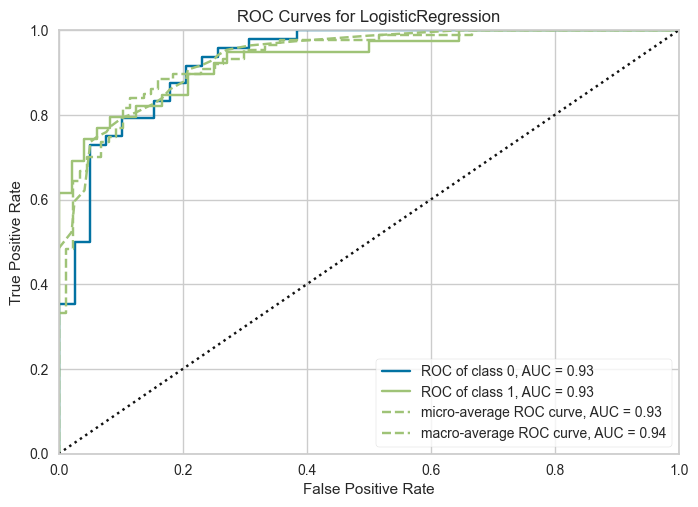

In [23]:
automl.plot_model(best_model)

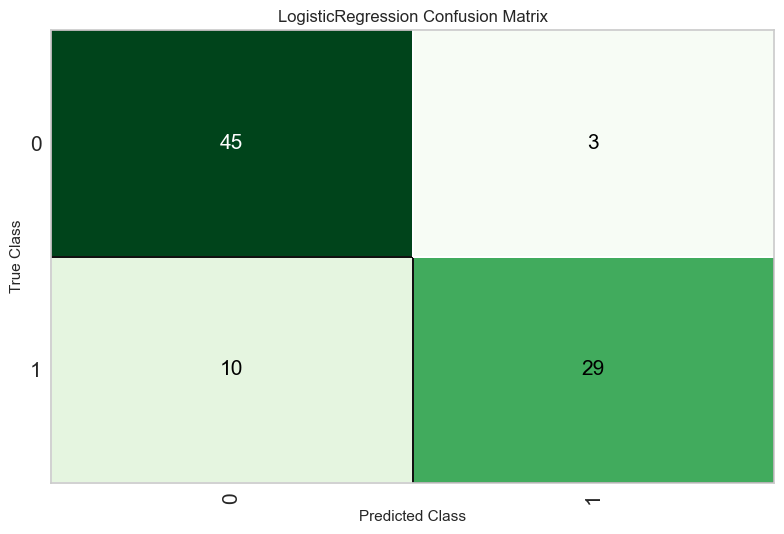

In [24]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [25]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease,prediction_label,prediction_score
288,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,1,1,0.9874


In [26]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8448,0.9214,0.7939,0.8525,0.8221,0.6848,0.6862


In [27]:
predictions.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease,prediction_label,prediction_score
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.7011
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,1,0.9837
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.9865
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.7971
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.9606


In [28]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'cp', 'trestbps',
                                              'chol', 'fbs', 'restecg',
                                              'thalach', 'exang', 'oldpeak',
                                              'slope', 'ca', 'thal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='d...
     

In [29]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [32]:
new_df = pd.read_csv('./data/heartdisease/new_cleveland.data',  names = names)
new_df['heartdisease'] = new_df['num'].replace({0:0, 1:1, 2:1, 3:1, 4:1})
new_df = new_df.drop('num', axis=1)
new_data = new_df
new_pycaret.predict_model(loaded_model, new_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease,prediction_label,prediction_score
0,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0,0,0.9806
1,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,1,1,0.9437
2,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,1,0.5816
3,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,0,0.8784
4,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1,1,0.9332
5,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1,1,0.8789
6,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,0,0.8911


<i> <u><b>Comments / learnings :  </b></u>  This Time, I created 2 data sets - cleaveland.data ( 290 records ) and new_cleveland.data ( 6 records ) . used the first dataset to get the best model using pycaret. the "automl.evaluate_model(best_model)" was interesting - it allowed to click on the different plots available.  then i saved the best model to a pickle file. with this saved pycaret model, I used the 2nd dataset to make the predictions.</i>

<p style="page-break-after:always;"></p>

# 3. Create a Python Script to Make Predictions

In [46]:
from IPython.display import Code
Code('predict_heartdisease.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads heartdisease data file into a DataFrame from a string filepath.
    """
    names=[ 'age','sex','cp','trestbps','chol','fbs','restecg', 'thalach','exang','oldpeak','slope','ca','thal','num']
    df = pd.read_csv(filepath,  names = names)
    df['heartdisease'] = df['num'].replace({0:0, 1:1, 2:1, 3:1, 4:1})
    df = df.drop('num', axis=1)
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    predictions.rename({'prediction_label': 'Heartdisease_prediction'}, axis=1, inplace=True)
    predictions['Heartdisease_prediction'].replace({1: 'Heart Disease', 0: 'No Heart Disease'},
                                            inplace=True)
    return predictions['Heartdisease_prediction']


if __name__ == "__main__":
    df = load_data('./data/heartdisease/new_cleveland.data')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [47]:
%run predict_heartdisease.py

Transformation Pipeline and Model Successfully Loaded
predictions:
0    No Heart Disease
1       Heart Disease
2       Heart Disease
3    No Heart Disease
4       Heart Disease
5       Heart Disease
6    No Heart Disease
Name: Heartdisease_prediction, dtype: object


<Figure size 800x550 with 0 Axes>

<i> <u><b>Comments / learnings :  </b></u>  to create the python file, I used the jupyter notbook itself. I have used pycharm before which provides coder friendly IDE. so wanted to try the jupyter notbook itself. I used the smaller dataset of 6 records to do the model and predictions. </i>

# Summary

<i> The automation ML was interesting. It allowed to choose the best model based on the accuracy score, save it and was able to use it on a different data set. Also learnt to create python scripts within the jyputer notebook environment. Finally setup a github account and published the code.</i>